NTEE,IRS_URL,TEXTTYPE,DataDrame,#Organizations
Yes,Yes,Yes,YYY,155585
Yes,Yes,No,YYN,86100
Yes,No,No,YNN,274437
No,Yes,Yes,NYY,41698
No,Yes,No,NYN,62999
No,No,No,NNN,0


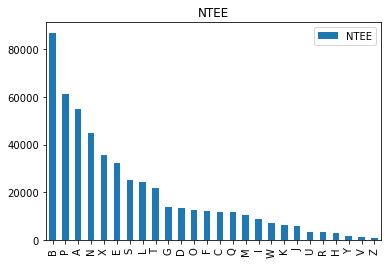

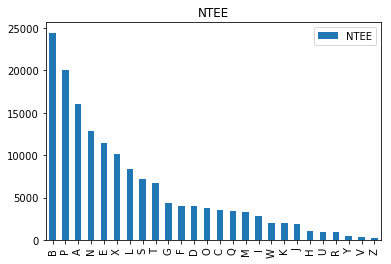

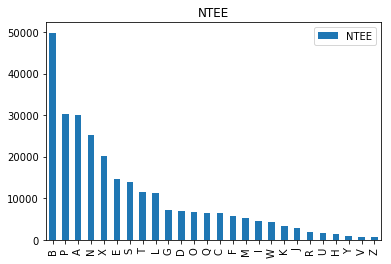

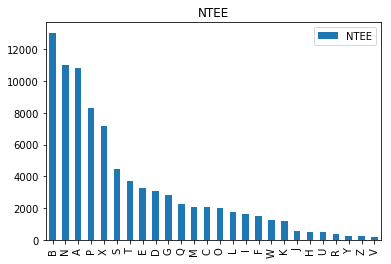

In [12]:
import pandas as pd
from IPython.display import HTML, display
import tabulate

df_dist = pd.read_pickle('../Data/2015/MasterData2015.pkl.gz')

#     NTEE  IRS_URL  TEXTTYPE   :  DataFrame

#     Yes      Yes     Yes    :   YYY
#     Yes      Yes     No     :   YYN
#     Yes      No      No     :   YNN
#     No      Yes      Yes    :   NYY
#     No      Yes      No     :   NYN
#     No       No      No     :   NNN [Doesn't Exist in this dataset]

#Keeping in mind that one organization may have more than one rows depending on number of tags found
#If proportion of organizations is to be measured, drop_duplicates('EIN') must be implemeted.

YYY = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.notna())]
YYN = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
YNN = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.isna()) & (df_dist.TEXTTYPE.isna())]
NYY = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.notna())]
NYN = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
NYN = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]

total_URL = len(df_dist[df_dist.IRS_URL.notna()].drop_duplicates('IRS_URL'))
total_ORG = len(df_dist.drop_duplicates('EIN'))   

Stats = [["NTEE","IRS_URL","TEXTTYPE", "DataDrame", "#Organizations"],
         ["Yes","Yes","Yes", "YYY", len(YYY.drop_duplicates('EIN'))],
         ["Yes","Yes","No", "YYN", len(YYN.drop_duplicates('EIN'))],
         ["Yes","No","No", "YNN", len(YNN.drop_duplicates('EIN'))],
         ["No","Yes","Yes", "NYY", len(NYY.drop_duplicates('IRS_URL'))],
         ["No","Yes","No", "NYN", len(NYN.drop_duplicates('IRS_URL'))],
         ["No","No","No", "NNN", 0]]

display(HTML(tabulate.tabulate(Stats, tablefmt='html')))

#Organizations' distributions based on categories
All_CatData = pd.concat([YYY, YYN, YNN]).drop_duplicates('EIN')
Org_Cat = pd.DataFrame(All_CatData['NTEE'])
Dist_Cat = Org_Cat.apply(pd.value_counts).plot(kind='bar', subplots=True)


#Organizations' distributions based on categories with URLs
All_CatwithURL = pd.concat([YYY, YYN]).drop_duplicates('IRS_URL')
Org_CatURL = pd.DataFrame(All_CatwithURL['NTEE'])
Dist_CatURL = Org_CatURL.apply(pd.value_counts).plot(kind='bar', subplots=True)

#Organizations' distribution based on missing URLs 
#Includes those with NTEE but no IRS_URL
Cat_MissingURL = pd.DataFrame(YNN.drop_duplicates('EIN')['NTEE'])
Dist_CatMissingURL = Cat_MissingURL.apply(pd.value_counts).plot(kind='bar', subplots=True)


#Organizations' distribution based on missing Texts 
#Includes those with NTEE and IRS_URL, but no Text found on sites from primary tag search.
Cat_MissingTXT = pd.DataFrame(YYN.drop_duplicates('EIN')['NTEE'])
Dist_CatMissingTXT = Cat_MissingTXT.apply(pd.value_counts).plot(kind='bar', subplots=True)
